In [110]:
import pandas as pd
import numpy as np

In [111]:
#Read CSV
url = "https://raw.githubusercontent.com/JonathanTanojo/dataminingweek8/main/Property_Dataset.csv"
df = pd.read_csv(url, sep=';')
df

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Below Standard,Setro Baru Utara,30.0,60.00,2,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
1,Standard,Kenjeran,170.0,170.00,5,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
2,Sangat Premium,Kenjeran,187.0,250.00,5,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
3,Premium,Kenjeran,350.0,600.00,5,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil
4,Premium,Kenjeran,450.0,530.00,5,6.0,2.0,10800000000,Belum,NaN,Standard,1-2 Mobil
...,...,...,...,...,...,...,...,...,...,...,...,...
302,Standard,Gununganyar,47.0,34,2,1.0,1.0,450000000,Belum,Utara,NaN,> 2 Mobil
303,Sangat Premium,Sukolilo,300.0,212,4,4.0,1.0,5250000000,Belum,Selatan,NaN,NaN
304,Premium,Mulyorejo,102.0,156,4,2.0,2.0,1950000000,Belum,Selatan,Standard,1-2 Mobil
305,Standard,Sukolilo,98.0,170,4,3.0,2.0,1550000000,Belum,NaN,Standard,> 2 Mobil


In [112]:
#cek apa ada value yang null
df.isnull().sum()

Area Category                      0
Nama Daerah                        0
Luas Tanah (m2)                    0
Luas Bangunan (m2)                 0
Jumlah Kamar                       0
Jumlah Kamar Mandi                 1
Tingkat/Lantai                     1
Harga Penawaran (dari Owner)       0
Terjual/Belum                      0
Arah Hadap Rumah                  82
Posisi Rumah                     115
Lebar Jalan Depan Rumah (ROW)     41
dtype: int64

In [113]:
#cek apakah ada data yang duplikat
df.duplicated().sum()

2

In [114]:
#mendrop adanya data yang duplikat 
df.drop_duplicates(keep=False, inplace=True)
df.duplicated().sum()

0

In [115]:
#membuat random 
import random
hadaprumah = ["Utara","Selatan","Timur","Barat"]
posisirumah = ["Tusuk Sate","Tikungan/Hook","Tusuk Belakang/Membelakangi Jalan","Kantong Belakang/Ngantong","Standard","Cul De Sac/Ujung Gang Buntu"]
lebarjalan = ["< 1 Mobil","1-2 Mobil","> 2 Mobil"]

In [116]:
#merandom isian akan value dari data yang null
df.dropna(subset=["Jumlah Kamar Mandi"],inplace=True)
df.dropna(subset=["Tingkat/Lantai "],inplace=True)
df["Arah Hadap Rumah"] = df['Arah Hadap Rumah'].fillna(random.choice(hadaprumah))
df["Posisi Rumah"] = df['Posisi Rumah'].fillna(random.choice(posisirumah))
df["Lebar Jalan Depan Rumah (ROW)"] = df['Lebar Jalan Depan Rumah (ROW)'].fillna(random.choice(lebarjalan))

In [117]:
#melakukan label encoder dari dataset yang ada

df['Area Category'] = lb.fit_transform(df['Area Category'])
df['Nama Daerah'] = lb.fit_transform(df['Nama Daerah'])
df['Luas Tanah (m2)'] = lb.fit_transform(df['Luas Tanah (m2)'])
df['Luas Bangunan (m2)'] = lb.fit_transform(df['Luas Bangunan (m2)'])
df['Jumlah Kamar'] = lb.fit_transform(df['Jumlah Kamar'])
df['Jumlah Kamar Mandi'] = lb.fit_transform(df['Jumlah Kamar Mandi'])
df['Tingkat/Lantai '] = lb.fit_transform(df['Tingkat/Lantai '])
df['Harga Penawaran (dari Owner)'] = lb.fit_transform(df['Harga Penawaran (dari Owner)'])
df['Terjual/Belum'] = lb.fit_transform(df['Terjual/Belum'])
df['Arah Hadap Rumah'] = lb.fit_transform(df['Arah Hadap Rumah'])
df['Posisi Rumah'] = lb.fit_transform(df['Posisi Rumah'])
df['Lebar Jalan Depan Rumah (ROW)'] = lb.fit_transform(df['Lebar Jalan Depan Rumah (ROW)'])

label encoder <br>
Area Category: <br>
0 = Below Standard <br>
1 = Premium <br>
2 = Sangat Premium <br>
3 = Standard <br>

Terjual/Belum: <br>
0 = Belum <br>
1 = Sudah <br>

Posisi Rumah: <br>
0 = Ujung Gang Buntu <br>
1 = Ngantong <br>
2 = Standard <br>
3 = Tikungan <br>
4 = Tusuk Belakang <br>
5 = Tusuk Sate

In [118]:
#melakukan scaling data
from sklearn.preprocessing import StandardScaler
sd_scaler = StandardScaler()
df_scale = sd_scaler.fit_transform(df.to_numpy())
df_scale = pd.DataFrame(df_scale, columns=['Area Category','Nama Daerah','Luas Tanah (m2)','Luas Bangunan (m2)','Jumlah Kamar','Jumlah Kamar Mandi','Tingkat/Lantai','Harga Penawaran (dari Owner)','Terjual/Belum','Arah Hadap Rumah','Posisi Rumah','Lebar Jalan Depan Rumah (ROW)'])
df_scale.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,-1.668737,1.031854,-1.682702,1.132775,-1.411036,-1.484438,0.290104,-0.072951,0.0,0.144047,-0.831451,0.084311
1,1.022102,-0.352105,0.061014,-0.751011,0.465496,0.422315,0.290104,-0.179960,0.0,-0.996956,-2.833584,-1.019060
2,0.125155,-0.352105,0.173512,-0.232970,0.465496,1.057899,0.290104,0.034058,0.0,1.285050,-0.831451,-1.019060
3,-0.771791,-0.352105,1.017245,1.179869,0.465496,1.057899,0.290104,0.890131,0.0,-2.137959,-0.831451,-1.019060
4,-0.771791,-0.352105,1.354739,0.991491,0.465496,1.693484,0.290104,-1.656686,0.0,0.144047,-0.831451,-1.019060


In [119]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="random",n_clusters=3,max_iter=300,random_state=42)

model = kmeans.fit_predict(df_scale)
model
df['K-MEANS'] = model
df

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),K-MEANS
0,0,98,5,117,1,0,2,80,0,2,2,1,2
1,3,48,67,37,4,3,2,75,0,1,0,0,0
2,2,48,71,59,4,4,2,85,0,3,2,0,1
3,1,48,101,119,4,4,2,125,0,0,2,0,1
4,1,48,113,111,4,5,2,6,0,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,3,32,10,79,1,0,0,115,0,3,4,2,2
303,2,103,93,46,3,3,0,126,0,1,4,1,0
304,1,72,40,28,3,1,2,51,0,1,2,0,0
305,3,103,38,36,3,2,2,31,0,2,2,2,0


C:\Users\jonat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


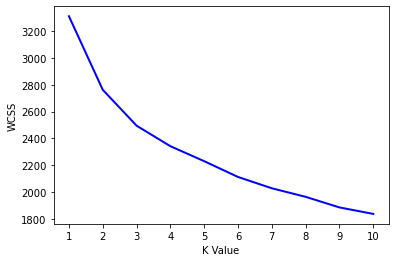

In [120]:
from matplotlib import pyplot as plt
wcss=[]
X2=df_scale
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="random")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1,11),wcss, linewidth=2, color="blue")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [121]:
from kneed import KneeLocator
findknee = KneeLocator(range(1,11), wcss, curve="convex",direction="decreasing")
print("The best K Value for you model is", findknee.elbow)

The best K Value for you model is 3


In [122]:
df.groupby('K-MEANS').agg(
    Area_Category=('Area Category',pd.Series.mode),
    Nama_Daerah=('Nama Daerah',pd.Series.mode),
    Luas_tanah=('Luas Tanah (m2)',pd.Series.mean),
    Luas_Bangunan=('Luas Bangunan (m2)',pd.Series.mean),
    Jumlah_Kamar=('Jumlah Kamar',pd.Series.mean),
    Jumlah_Kamar_Mandi=('Jumlah Kamar Mandi',pd.Series.mean),
    Tingkat=('Tingkat/Lantai ',pd.Series.mean),
    Harga=('Harga Penawaran (dari Owner)',pd.Series.mean),
    Terjual=('Terjual/Belum',pd.Series.mode),
    Hadap=('Arah Hadap Rumah',pd.Series.mode),
    Letak=('Posisi Rumah',pd.Series.mode),
    Luas=('Lebar Jalan Depan Rumah (ROW)',pd.Series.mean), Count = ("K-MEANS",'count'))

,Area_Category,Nama_Daerah,Luas_tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat,Harga,Terjual,Hadap,Letak,Luas,Count
K-MEANS,,,,,,,,,,,,,
0,3,72,51.325397,31.642857,2.801587,1.857143,1.626984,66.103175,0,2,2,0.777778,126
1,1,11,96.346774,85.185484,4.500000,3.556452,2.048387,96.516129,0,3,4,1.161290,124
2,3,11,21.568627,121.313725,1.352941,0.549020,1.058824,94.294118,0,2,2,0.705882,51


<H2>Dendogram Hierechical 

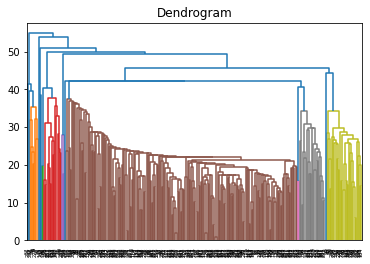

In [131]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(df, method = 'single'))
plt.title('Dendrogram')
plt.show()

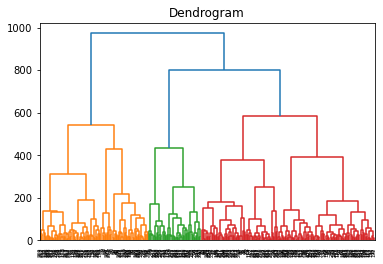

In [133]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.show()

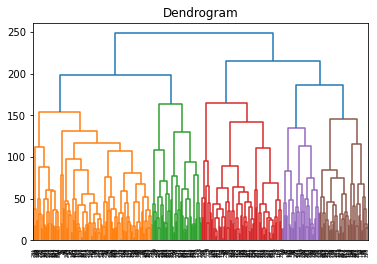

In [134]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(df, method = 'complete'))
plt.title('Dendrogram')
plt.show()

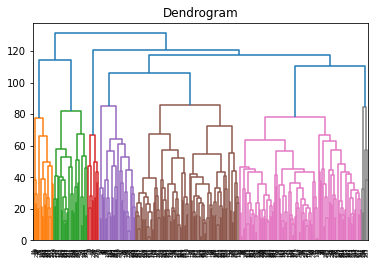

In [137]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(df, method = 'average'))
plt.title('Dendrogram')
plt.show()

In [127]:
from sklearn.cluster import AgglomerativeClustering
hc_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
Huh = hc_model.fit_predict(df_scale)

In [128]:
df1 = df.copy()
df1['Hierarchical'] = Huh
df1

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),K-MEANS,Hierarchical
0,0,98,5,117,1,0,2,80,0,2,2,1,2,2
1,3,48,67,37,4,3,2,75,0,1,0,0,0,0
2,2,48,71,59,4,4,2,85,0,3,2,0,1,0
3,1,48,101,119,4,4,2,125,0,0,2,0,1,1
4,1,48,113,111,4,5,2,6,0,2,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,3,32,10,79,1,0,0,115,0,3,4,2,2,2
303,2,103,93,46,3,3,0,126,0,1,4,1,0,0
304,1,72,40,28,3,1,2,51,0,1,2,0,0,0
305,3,103,38,36,3,2,2,31,0,2,2,2,0,0


In [129]:
df1.groupby('Hierarchical').agg(
    Area_Category=('Area Category',pd.Series.mode),
    Nama_Daerah=('Nama Daerah',pd.Series.mode),
    Luas_tanah=('Luas Tanah (m2)',pd.Series.mean),
    Luas_Bangunan=('Luas Bangunan (m2)',pd.Series.mean),
    Jumlah_Kamar=('Jumlah Kamar',pd.Series.mean),
    Jumlah_Kamar_Mandi=('Jumlah Kamar Mandi',pd.Series.mean),
    Tingkat=('Tingkat/Lantai ',pd.Series.mean),
    Harga=('Harga Penawaran (dari Owner)',pd.Series.mean),
    Terjual=('Terjual/Belum',pd.Series.mode),
    Hadap=('Arah Hadap Rumah',pd.Series.mode),
    Letak=('Posisi Rumah',pd.Series.mode),
    Luas=('Lebar Jalan Depan Rumah (ROW)',pd.Series.mean), Count = ("K-MEANS",'count'))

,Area_Category,Nama_Daerah,Luas_tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat,Harga,Terjual,Hadap,Letak,Luas,Count
Hierarchical,,,,,,,,,,,,,
0,3,72,56.141844,39.375887,2.985816,2.042553,1.631206,70.950355,0,2,2,0.843972,141
1,1,11,97.740741,86.870370,4.574074,3.620370,2.064815,97.027778,0,3,4,1.148148,108
2,3,11,20.038462,111.596154,1.250000,0.461538,1.153846,88.903846,0,2,2,0.673077,52
